In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates

Oct14 = pd.read_csv('Oct14_5s.csv',skiprows=[0,2,3])
#Nov2 = pd.read_csv() # NO DATA FOR NOV 2
Nov3 = pd.read_csv('Nov3_5s.csv',skiprows=[0,2,3])
Nov9 = pd.read_csv('FS_Fall1_5s_collectedNov9.csv',skiprows=[0,2,3])
Nov4 = Nov9[3939:]
Nov10 = pd.read_csv('Nov10_5s.csv',skiprows=[0,2,3])

In [6]:
Oct14time = Oct14['TIMESTAMP']
Oct14x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Oct14time]
Nov3time = Nov3['TIMESTAMP']
Nov3x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Nov3time]
Nov4time = Nov4['TIMESTAMP']
Nov4x = [datetime.datetime.strptime(s, "%m/%d/%Y %H:%M") for s in Nov4time]
Nov10time = Nov10['TIMESTAMP']
Nov10x = [datetime.datetime.strptime(s, "%m/%d/%y %H:%M") for s in Nov10time]
xfmt = mdates.DateFormatter('%H:%M')

In [10]:
# Reading in and converting to mph from m/s
FS14_wd = Oct14['WindDir']
FS14_ws = Oct14['WS_ms_2']*2.236936
FS3_wd = Nov3['WindDir']
FS3_ws = Nov3['WS_ms_2']*2.236936
FS4_wd = Nov4['WindDir']
FS4_ws = Nov4['WS_ms_2']*2.236936
FS10_wd = Nov10['WindDir']
FS10_ws = Nov10['WS_ms_2']*2.236936

In [11]:
from windrose_GM import WindroseAxes
import matplotlib.cm as cm

def WindRose(wd,ws):
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=0.9, edgecolor='white')
    ax.legend((0,1), fontsize=11, title='Wind Speed (mph)')
    
    ax.bar(wd, ws, normed=True, nsector=16, edgecolor='white')
    table = ax._info['table']
    wd_freq = np.sum(table, axis=0)
    return wd_freq

def WindHist(wd_freq):
    fig = plt.figure(figsize=(8,4))
    plt.bar(np.arange(16), wd_freq, align='center')
    ax = plt.gca()
    xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
    xticks=np.arange(16)
    ax.set_ylabel('Frequency of Wind Direction')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels);

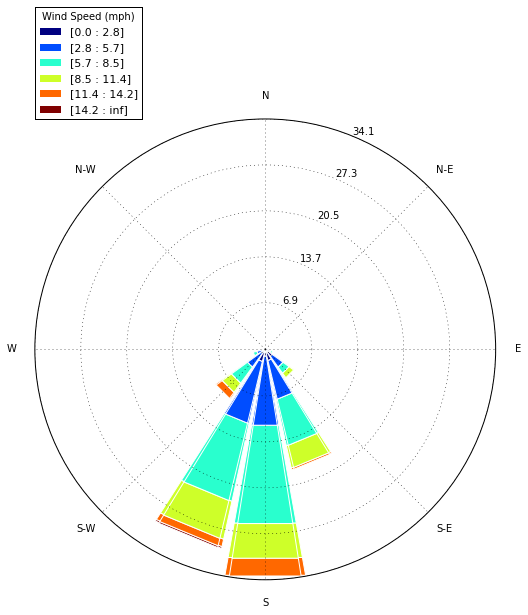

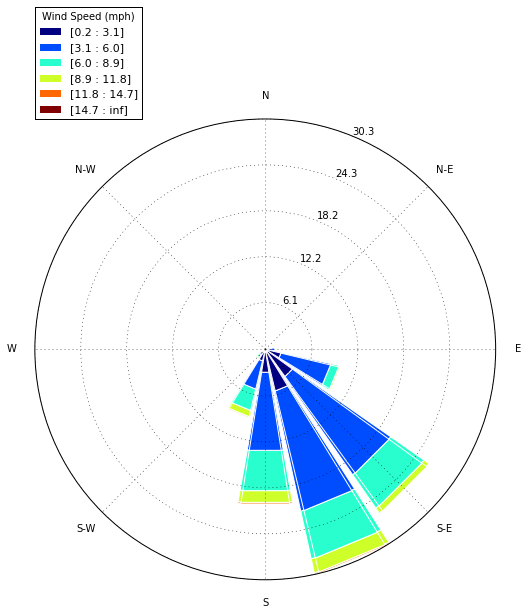

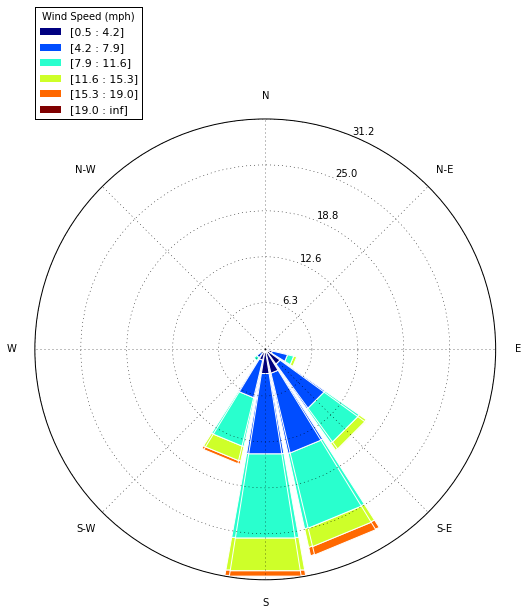

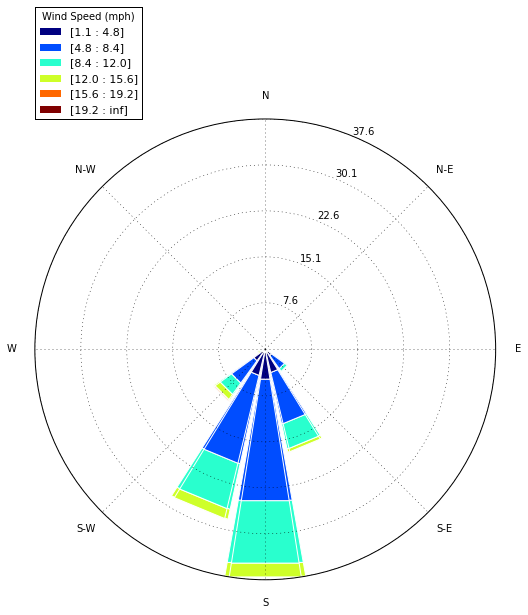

In [13]:
fFS14 = WindRose(FS14_wd,FS14_ws);
fFS3 = WindRose(FS3_wd,FS3_ws);
fFS4 = WindRose(FS4_wd,FS4_ws);
fFS10 = WindRose(FS10_wd,FS10_ws);

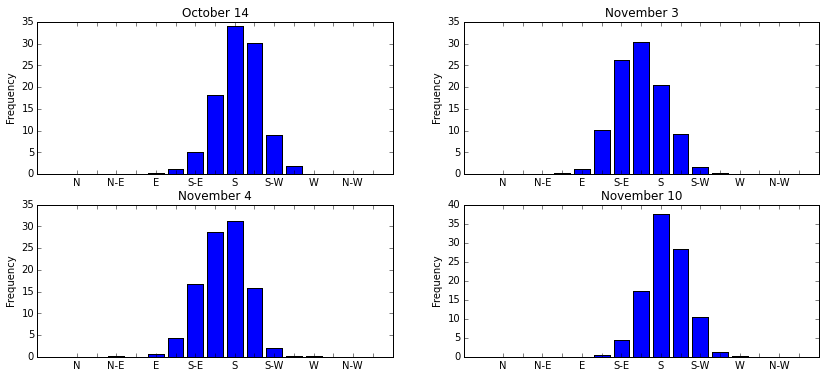

In [18]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(221)
plt.bar(np.arange(16), fFS14, align='center')
ax1 = plt.gca()
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
ax1.set_ylabel('Frequency')
ax1.set_title('October 14')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels);

ax2 = fig.add_subplot(222)
plt.bar(np.arange(16), fFS3, align='center')
ax2.set_ylabel('Frequency')
ax2.set_title('November 3')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabels);

ax3 = fig.add_subplot(223)
plt.bar(np.arange(16), fFS4, align='center')
ax3.set_ylabel('Frequency')
ax3.set_title('November 4')
ax3.set_xticks(xticks)
ax3.set_xticklabels(xlabels);

ax4 = fig.add_subplot(224)
plt.bar(np.arange(16), fFS10, align='center')
ax4.set_ylabel('Frequency')
ax4.set_title('November 10')
ax4.set_xticks(xticks)
ax4.set_xticklabels(xlabels);

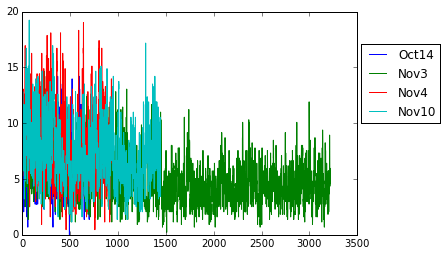

In [19]:
plt.plot(FS14_ws,label='Oct14')
plt.plot(FS3_ws,label='Nov3')
plt.plot(FS4_ws,label='Nov4')
plt.plot(FS10_ws,label='Nov10')
plt.legend(loc=(1.01,0.5))